In [1]:
from mplsoccer import Pitch, FontManager, Sbopen
from matplotlib import rcParams
import matplotlib.pyplot as plt
import pandas as pd

rcParams['text.color'] = '#c7d5cc'  # set the default text color

df = pd.read_csv('../data/events_simplified/3753973.csv')

In [2]:
team1, team2 = df['team'].unique()
team1, team2 

('Chelsea', 'West Ham United')

In [3]:
mask_team1 = (df.type == 'Pass') & (df.team == team2)

In [4]:
df_pass = df.loc[mask_team1, ['location', 'pass_end_location', 'pass_outcome']]
df_pass_new = pd.DataFrame({}, columns=['x', 'y', 'end_x', 'end_y', 'pass_outcome'])

for i in range(len(df_pass)):
    x, y = df_pass.iloc[i]['location'][1:-1].replace(' ', '').split(',')
    end_x, end_y = df_pass.iloc[i]['pass_end_location'][1:-1].replace(' ', '').split(',')
    new_row = pd.DataFrame([[float(x), float(y), float(end_x), float(end_y), df_pass.iloc[i]['pass_outcome']]],
                            columns=['x', 'y', 'end_x', 'end_y', 'pass_outcome'])
    df_pass_new = pd.concat((df_pass_new, new_row))

df_pass = df_pass_new
df_pass = df_pass.reset_index(drop=True)
df_pass

/var/folders/tv/_qfcls8d76jd1sp6y_8qsd700000gn/T/ipykernel_33753/2235184972.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_pass_new = pd.concat((df_pass_new, new_row))


,x,y,end_x,end_y,pass_outcome
0,61.0,40.1,60.7,43.6,NaN
1,60.7,43.6,56.6,41.5,NaN
2,57.1,43.0,55.0,73.0,NaN
3,55.0,73.0,35.2,52.5,NaN
4,30.9,55.7,28.7,27.4,NaN
...,...,...,...,...,...
581,44.1,29.7,31.9,19.6,NaN
582,32.7,19.9,50.6,3.6,NaN
583,51.5,9.0,63.6,23.5,NaN
584,74.7,3.6,64.2,3.0,NaN


In [5]:
df_pass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   x             586 non-null    float64
 1   y             586 non-null    float64
 2   end_x         586 non-null    float64
 3   end_y         586 non-null    float64
 4   pass_outcome  125 non-null    object 
dtypes: float64(4), object(1)
memory usage: 23.0+ KB


In [6]:
mask_complete = df_pass.pass_outcome.isnull()
mask_complete

0       True
1       True
2       True
3       True
4       True
       ...  
581     True
582     True
583     True
584     True
585    False
Name: pass_outcome, Length: 586, dtype: bool

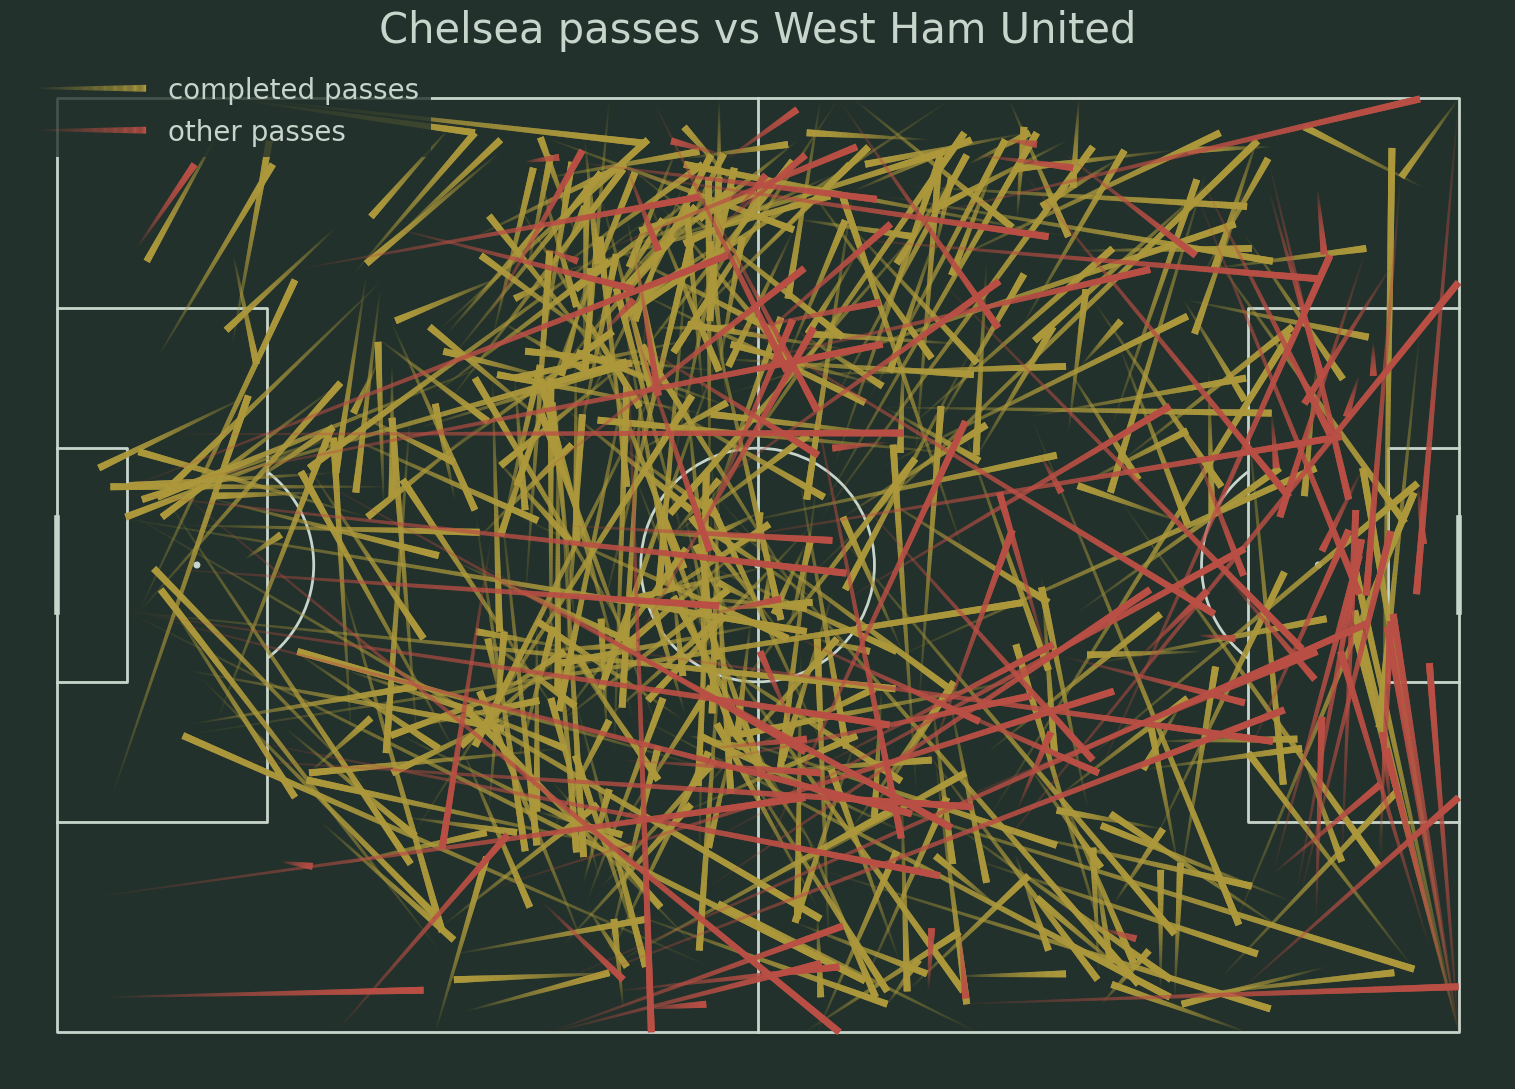

In [7]:
# Setup the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=False, tight_layout=True)
fig.set_facecolor('#22312b')

# Plot the completed passes
lc1 = pitch.lines(df_pass[mask_complete].x, df_pass[mask_complete].y,
                  df_pass[mask_complete].end_x, df_pass[mask_complete].end_y,
                  lw=5, transparent=True, comet=True, label='completed passes',
                  color='#ad993c', ax=ax)

# Plot the other passes
lc2 = pitch.lines(df_pass[~mask_complete].x, df_pass[~mask_complete].y,
                  df_pass[~mask_complete].end_x, df_pass[~mask_complete].end_y,
                  lw=5, transparent=True, comet=True, label='other passes',
                  color='#ba4f45', ax=ax)

# Plot the legend
ax.legend(facecolor='#22312b', edgecolor='None', fontsize=20, loc='upper left', handlelength=4)

# Set the title
ax_title = ax.set_title(f'{team1} passes vs {team2}', fontsize=30)